In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import math
import matplotlib
import pandas
import glob
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [3]:
from diameter_tools import get_trunk_diam

In [4]:
def load_data() -> pandas.DataFrame:
    a = glob.glob('data/*.csv')

    data = None
    l = []
    for f in a:
        dataset = pandas.read_csv(f)
        l.append(dataset)
    data = pandas.concat(l)
    return data

data = load_data()


/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [5]:
def get_species_list(data: pandas.DataFrame) -> pandas.DataFrame:
    sp = pandas.DataFrame()
    sp['Nazwa łacińska'] = data['Nazwa łacińska']
    sp['Nazwa polska'] = data['Nazwa polska']
    species_unique = sp.drop_duplicates()
    return species_unique

species_unique = get_species_list(data)


In [6]:
data['norm'] = data['Obwód pnia w cm'].fillna('0')
data.dropna(subset=['Obwód pnia w cm', 'norm',], inplace=True)
data['norm'] = data['norm'].apply(pandas.Series)

In [7]:
data['normalized_trunk_diam'] = data['norm'].apply(get_trunk_diam)
data['normalized_trunk_diam'] = data['normalized_trunk_diam'] / 100

34 malformed node or string: 34 <class 'int'>
32 malformed node or string: 32 <class 'int'>
38 malformed node or string: 38 <class 'int'>
8 malformed node or string: 8 <class 'int'>
40 malformed node or string: 40 <class 'int'>
50 malformed node or string: 50 <class 'int'>
61 malformed node or string: 61 <class 'int'>
36 malformed node or string: 36 <class 'int'>
54 malformed node or string: 54 <class 'int'>
67 malformed node or string: 67 <class 'int'>
63 malformed node or string: 63 <class 'int'>
57.0 malformed node or string: 57.0 <class 'float'>


In [8]:
data['height'] = data['Wysokość w m'].fillna('0')
data['height'] = data['height'].str.replace(',', '.')
data['height'] = data['height'].astype(np.float)

In [9]:
df2 = data[['height', 'normalized_trunk_diam']]

In [10]:
df2.dropna(inplace=True)

/home/sir/.virtualenvs/tree/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
COLUMNS = ['SREDNICA_KORONY', 'OBWOD', 'O3', 'NO2', 'SO2', 'PM2.5', ]

trees = pandas.read_csv('data/trees.csv', sep=';')


In [12]:
trees.describe()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5
count,6561.000000,6561.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,86.275415,3.915303,151.431181,88.133532,10.511538,7.938523
std,75.666527,2.303517,127.897838,74.448851,8.840640,6.789392
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,36.900000,19.800000,2.800000,2.800000
50%,82.000000,4.000000,136.100000,79.400000,8.500000,8.500000
75%,123.000000,5.000000,226.800000,130.400000,17.000000,11.300000
max,2222.000000,44.000000,932.700000,544.300000,65.200000,48.200000


In [13]:
trees.dropna(inplace=True)
trees = trees[trees['OBWOD'] < 300]
trees = trees[trees['SREDNICA_KORONY'] < 20]
metrics.r2_score(trees['O3'], trees['NO2'])

0.5652789778593613

In [14]:
le = preprocessing.LabelEncoder()
le.fit(trees['GATUNEK_Scientific'])

LabelEncoder()

In [15]:
le.classes_
transformed = le.transform(trees['GATUNEK_Scientific'])

In [16]:
trees['SPECIES'] = transformed

In [17]:
trees['SPECIES'].unique()

array([42, 46, 73, 76, 74,  2, 24,  3,  4, 38, 13, 58, 40, 14, 18,  9, 36,
       22, 43, 44, 45, 35, 30, 19, 61, 72,  6, 20, 52, 55, 29, 32, 75, 77,
       68, 25,  8,  1, 63, 59,  5, 71, 47, 41, 60, 62, 69, 49, 51, 27, 26,
       17,  7, 31,  0, 21, 12, 34, 11, 56, 48, 28, 67, 64, 70, 57, 50, 54,
       23, 33, 53, 10, 66, 16, 65, 39, 15, 37])

In [18]:
top = trees.SPECIES.value_counts()
top.sort_values(ascending=False, inplace=True)
tops = list(top[:5].index)


In [19]:
le.inverse_transform(tops)

array(['Tilia cordata', 'Acer platanoides', 'Fraxinus pennsylvanica',
       'Quercus robur', 'Tilia  sp.'], dtype=object)

In [20]:
data['trunk_diam_cm'] = data['normalized_trunk_diam'] * 100

In [21]:
gatunki = pandas.read_csv('gatunki_warszawa_typ.csv')


In [22]:
data['GATUNEK_Scientific'] = data['Nazwa łacińska']

In [23]:
newdata = data[data['GATUNEK_Scientific'].isin(trees['GATUNEK_Scientific'])]

In [24]:
del newdata['GATUNEK_Scientific;OBWOD;SREDNICA_KORONY;O3;NO2;SO2;PM2.5']
newdata.head()

,Aktualność danych na dzień,Jednostka zarządzająca,Nazwa polska,Nazwa łacińska,Numer inwentaryzacyjny,Obwód pnia w cm,Wysokość w m,gtype,height,id,id.1,imgurl,width,x,y,norm,normalized_trunk_diam,trunk_diam_cm,GATUNEK_Scientific
0,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253003,98,14,2001.0,NaN,AAKG9OAAnAAF1O1AAG,AAKG9OAAnAAF1O1AAG,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503078e+06,5.792584e+06,98,0.311944,31.194369,Robinia sp.
1,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253005,"17, 9, 8, 10, 11",5,2001.0,NaN,AAKG9OAAnAAF1O1AAI,AAKG9OAAnAAF1O1AAI,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503081e+06,5.792579e+06,"17, 9, 8, 10, 11",0.081465,8.146495,Robinia sp.
2,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253007,20,5,2001.0,NaN,AAKG9OAAnAAF1O1AAK,AAKG9OAAnAAF1O1AAK,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503081e+06,5.792575e+06,20,0.063662,6.366198,Robinia sp.
3,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253006,30,4.5,2001.0,NaN,AAKG9OAAnAAF1O1AAJ,AAKG9OAAnAAF1O1AAJ,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1.0,7.503083e+06,5.792575e+06,30,0.095493,9.549297,Robinia sp.
4,24.04.2012,Dzielnica Targówek,robinia sp.,Robinia sp.,D253004,"120, 10, 11, 8",14,2001.0,NaN,AAKG9OAAnAAF1O1AAH,AAKG9OAAnAAF1O1AAH,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,3.0,7.503084e+06,5.792577e+06,"120, 10, 11, 8",0.385733,38.573327,Robinia sp.


In [34]:
trees.GATUNEK_Scientific.value_counts()


Tilia cordata                       2062
Acer platanoides                     688
Fraxinus pennsylvanica               547
Quercus robur                        408
Tilia  sp.                           360
Quercus rubra                        291
Robinia  sp.                         244
Acer saccharinum                     177
Acer pseudoplatanus                  175
Acer negundo                         162
Fraxinus excelsior                   127
Platanus x hispanica                 107
Aesculus  sp.                         86
Aesculus xcarnea                      79
Malus  sp.                            77
Populus  sp.                          75
Crataegus monogyna                    67
Ginkgo biloba                         61
Carpinus betulus                      61
Aesculus hippocastanum                53
Prunus cerasifera                     47
Populus nigra                         46
Sorbus intermedia                     46
Sorbus aucuparia                      41
Elaeagnus angust

In [96]:
trees['OBWOD_KW'] = trees['OBWOD'] ** 2

In [120]:
x_train, x_validation, y_train, y_validation = train_test_split(
    trees[['OBWOD', 'OBWOD_KW']],
    trees['SREDNICA_KORONY'],
    test_size=0.25,
)

regression = LinearRegression()
regression.fit(
    x_train,
    y_train,
)

print(mean_absolute_percentage_error(y_train, regression.predict(x_train)))
print(r2_score(y_train, regression.predict(x_train)))


# mean_absolute_percentage_error(y_validation, regression.predict(x_validation))

25.529650894320145
0.7072266349603087


In [93]:
len(x_train)

4889

0.05126278970523201 -9.939295099421934e-05 0.5977847620595296


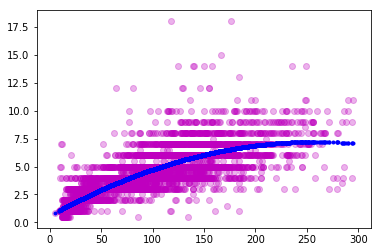

In [121]:
a1, a2, b = regression.coef_[0], regression.coef_[1], regression.intercept_
print(a1, a2, b)
fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_KW'] + b

plt.plot(trees['OBWOD'], fn, 'b.')
plt.scatter(trees['OBWOD'], trees['SREDNICA_KORONY'], c='m', alpha=0.3)

0.7891692272994983
{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'coef_': array([ 0.05864127, -0.00016696]), '_residues': 142.65669227791366, 'rank_': 2, 'singular_': array([164097.55156611,    205.00986227]), 'intercept_': 0.09930872718423478}


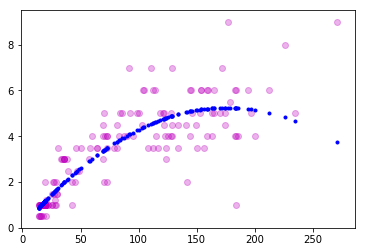

In [105]:
filter_by = 'Robinia  sp.'

trees2 = trees[trees['GATUNEK_Scientific'] == filter_by]

def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_KW']],
        trees_df['SREDNICA_KORONY'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg = get_reg(trees2)
print(vars(reg))



a1, a2, b = reg.coef_[0], reg.coef_[1], reg.intercept_

fn = a1 * trees2['OBWOD'] + a2 * trees2['OBWOD_KW'] + b

plt.plot(trees2['OBWOD'], fn, 'b.')
plt.scatter(trees2['OBWOD'], trees2['SREDNICA_KORONY'], c='m', alpha=0.3)


0.6769986688545043
{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'coef_': array([ 0.05196328, -0.0001242 ]), '_residues': 1440.2525041129743, 'rank_': 2, 'singular_': array([340542.48616332,    553.0601514 ]), 'intercept_': 0.6167425777475652}


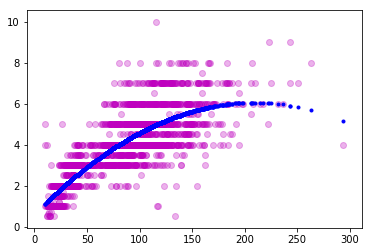

In [112]:
filter_by = 'Tilia cordata'

trees2 = trees[trees['GATUNEK_Scientific'] == filter_by]

def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_KW']],
        trees_df['SREDNICA_KORONY'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg = get_reg(trees2)
print(vars(reg))

a1, a2, b = reg.coef_[0], reg.coef_[1], reg.intercept_

fn = a1 * trees2['OBWOD'] + a2 * trees2['OBWOD_KW'] + b

plt.plot(trees2['OBWOD'], fn, 'b.')
plt.scatter(trees2['OBWOD'], trees2['SREDNICA_KORONY'], c='m', alpha=0.3)
